In [1]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [6]:
X, y = mglearn.datasets.load_extended_boston()

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [7]:
data

(array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
         1.00000000e+00, 8.96799117e-02, 8.04248656e-03],
        [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
         1.00000000e+00, 2.04470199e-01, 4.18080621e-02],
        [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
         9.79579831e-01, 6.28144504e-02, 4.02790570e-03],
        ...,
        [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
         1.00000000e+00, 1.07891832e-01, 1.16406475e-02],
        [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
         9.82676920e-01, 1.29930407e-01, 1.71795127e-02],
        [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
         1.00000000e+00, 1.69701987e-01, 2.87987643e-02]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7,

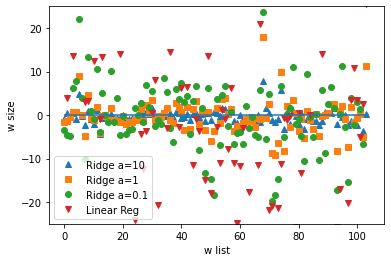

In [18]:
# 훈련/테스트 데이터로 나누어 학습하기

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

# alpha값에 다른 coef속성(w)의 변화를 그래프로 확인해보자.
# alpha 매개변수가 모델을 어떻게 변경시키는지 이해할 수 있다.
# alpha값이 높으면 제약이 많으므로 작은값일 때 보다 절대값의 크기가 작을것이다.(일반화가 쉬워지므로)

plt.plot(ridge10.coef_,'^',label="Ridge a=10")
plt.plot(ridge.coef_,'s',label="Ridge a=1")
plt.plot(ridge01.coef_,'o',label="Ridge a=0.1")

plt.plot(lr.coef_,'v',label="Linear Reg")
plt.xlabel("w list")
plt.ylabel("w size")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()


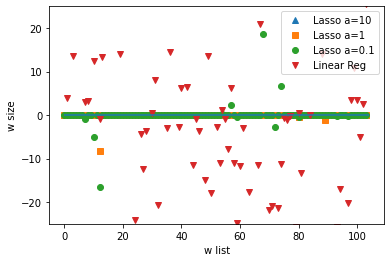

In [19]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
lasso10 = Lasso(alpha=10).fit(X_train, y_train)
lasso01 = Lasso(alpha=0.1).fit(X_train, y_train)

# alpha값에 다른 coef속성(w)의 변화를 그래프로 확인해보자.
# alpha 매개변수가 모델을 어떻게 변경시키는지 이해할 수 있다.
# alpha값이 높으면 제약이 많으므로 작은값일 때 보다 절대값의 크기가 작을것이다.(일반화가 쉬워지므로)

plt.plot(lasso10.coef_,'^',label="Lasso a=10")
plt.plot(lasso.coef_,'s',label="Lasso a=1")
plt.plot(lasso01.coef_,'o',label="Lasso a=0.1")

plt.plot(lr.coef_,'v',label="Linear Reg")
plt.xlabel("w list")
plt.ylabel("w size")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()